## Bibliotecas usadas

In [1]:
# Iniciando

In [1]:
!pip install matplotlib
!pip install librosa
!pip install tensorflow
!pip install seaborn
import os
import warnings
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import IPython
import librosa
import tensorflow as tf
import sklearn.metrics as skm
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras import layers, models, utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from keras.preprocessing import image
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow import keras

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


2024-06-23 12:46:45.424598: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 12:46:45.426836: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 12:46:45.454581: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 12:46:46.005265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Datasets

## Extraindo os dados para o Dataframe

In [4]:
# Inicializa listas vazias para armazenar caminhos de arquivos e seus respectivos estados de humor
paths = []
moods = []

# Itera sobre as pastas de humor no caminho raiz
for mood in os.listdir(rootPath):
    # Itera sobre os arquivos dentro de cada pasta de humor
    for file in os.listdir(rootPath + "/" + mood):
        # Constrói o caminho completo do arquivo e o adiciona à lista de caminhos
        paths.append(rootPath + "/" + mood + "/" + file)
        # Adiciona o humor atual à lista de estados de humor
        moods.append(mood)

# Cria um DataFrame do Pandas com as colunas "filePath" e "mood"
data_RF_25k = pd.DataFrame(columns=["filePath", "mood"])

# Atribui as listas de caminhos de arquivo e estados de humor às respectivas colunas do DataFrame
data_RF_25k["filePath"] = paths
data_RF_25k["mood"] = moods

## Mostrando o Dataset

In [5]:
# Exibe as primeiras cinco linhas do DataFrame 'data' para uma rápida visualização dos dados
data_RF_25k.head()

filePath        mood
0  /home/camila/Jupyter_notebook/dataset_400_sep/...  aggressive
1  /home/camila/Jupyter_notebook/dataset_400_sep/...  aggressive
2  /home/camila/Jupyter_notebook/dataset_400_sep/...  aggressive
3  /home/camila/Jupyter_notebook/dataset_400_sep/...  aggressive
4  /home/camila/Jupyter_notebook/dataset_400_sep/...  aggressive

## Checando os valores de entrada

In [6]:
# Calcula e exibe a contagem de ocorrências de cada valor na coluna 'mood' do DataFrame 'data'
data_RF_25k["mood"].value_counts()

mood
happy         86
dramatic      47
sad           44
romantic      37
aggressive    10
Name: count, dtype: int64

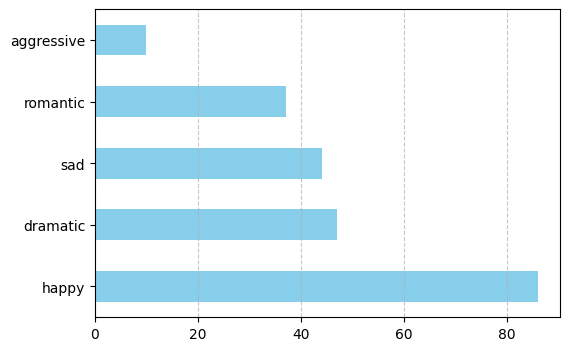

In [7]:
import matplotlib.pyplot as plt

# Obtendo os valores de contagem para cada estado de ânimo
value_counts = data_RF_25k["mood"].value_counts()

# Criando o gráfico de barras horizontal com figura maior
plt.figure(figsize=(6, 4))
value_counts.plot(kind='barh', color='skyblue')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("/home/camila/Jupyter_notebook/figura/antes_smote.png", bbox_inches='tight')

## Normalizando áudios

In [8]:
# Inicializa uma lista para armazenar amostras de áudio
samples = []

# Taxa de amostragem padrão
sr = 22050

# Itera sobre as pastas de humor no caminho raiz
for mood in os.listdir(rootPath):
    # Cria um dicionário para armazenar informações da amostra, iniciando com o estado de humor
    sample = {"mood": mood}

    # Filtra os dados para obter apenas as entradas correspondentes ao estado de humor atual
    moodData = data_RF_25k[data_RF_25k.mood == mood]

    # Exibe o estado de humor atual
    print(mood + ":")

    # Exibe um player de áudio para a 20ª entrada do estado de humor atual
    IPython.display.display(IPython.display.Audio(moodData.iloc[10, 0]))

    # Carrega o sinal de áudio da 30ª entrada do estado de humor atual usando a biblioteca librosa
    signal, _ = librosa.load(moodData.iloc[12, 0], sr=sr)

    # Adiciona o sinal de áudio ao dicionário de amostra
    sample["signal"] = signal

    # Adiciona o dicionário de amostra à lista de amostras
    samples.append(sample)


aggressive:


IndexError: index 10 is out of bounds for axis 0 with size 10

In [9]:
# Inicializa uma lista para armazenar amostras de áudio
samples = []

# Taxa de amostragem padrão
sr = 22050

# Itera sobre as pastas de humor no caminho raiz
for mood in os.listdir(rootPath):
    # Cria um dicionário para armazenar informações da amostra, iniciando com o estado de humor
    sample = {"mood": mood}

    # Filtra os dados para obter apenas as entradas correspondentes ao estado de humor atual
    moodData = data_RF_25k[data_RF_25k.mood == mood]

    # Exibe o estado de humor atual
    print(mood + ":")

    # Exibe um player de áudio para a 20ª entrada do estado de humor atual
    IPython.display.display(IPython.display.Audio(moodData.iloc[10, 0]))

    # Carrega o sinal de áudio da 30ª entrada do estado de humor atual usando a biblioteca librosa
    signal, _ = librosa.load(moodData.iloc[12, 0], sr=sr)

    # Adiciona o sinal de áudio ao dicionário de amostra
    sample["signal"] = signal

    # Adiciona o dicionário de amostra à lista de amostras
    samples.append(sample)


aggressive:


IndexError: index 10 is out of bounds for axis 0 with size 10

## Mostrando os Dados Graficamente

### Gráfico: Amplitude x Tempo

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

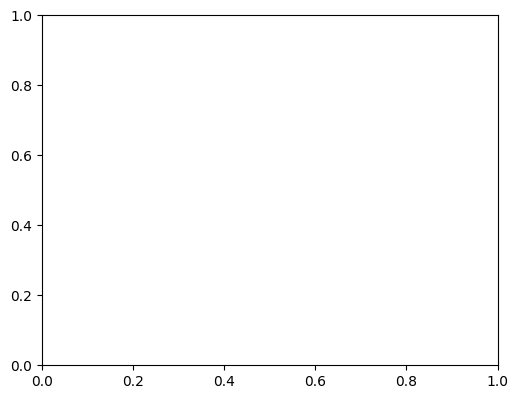

In [9]:
# Cria uma figura para visualizar as formas de onda dos sinais de áudio
fig = plt.figure(figsize=(20, 10))

# Itera sobre as amostras e exibe a forma de onda de cada sinal
for i, sample in enumerate(samples):
    plt.subplot(2, 3, i + 1)

    # Exibe a forma de onda usando a função waveshow da biblioteca librosa
    librosa.display.waveshow(sample["signal"], sr=sr, alpha=0.4)

    # Adiciona rótulos e título para melhor interpretação
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    plt.title(sample["mood"])

# Exibe a figura consolidando todas as visualizações
plt.show()

### Gráfico: Espectograma

<Figure size 1000x800 with 0 Axes>

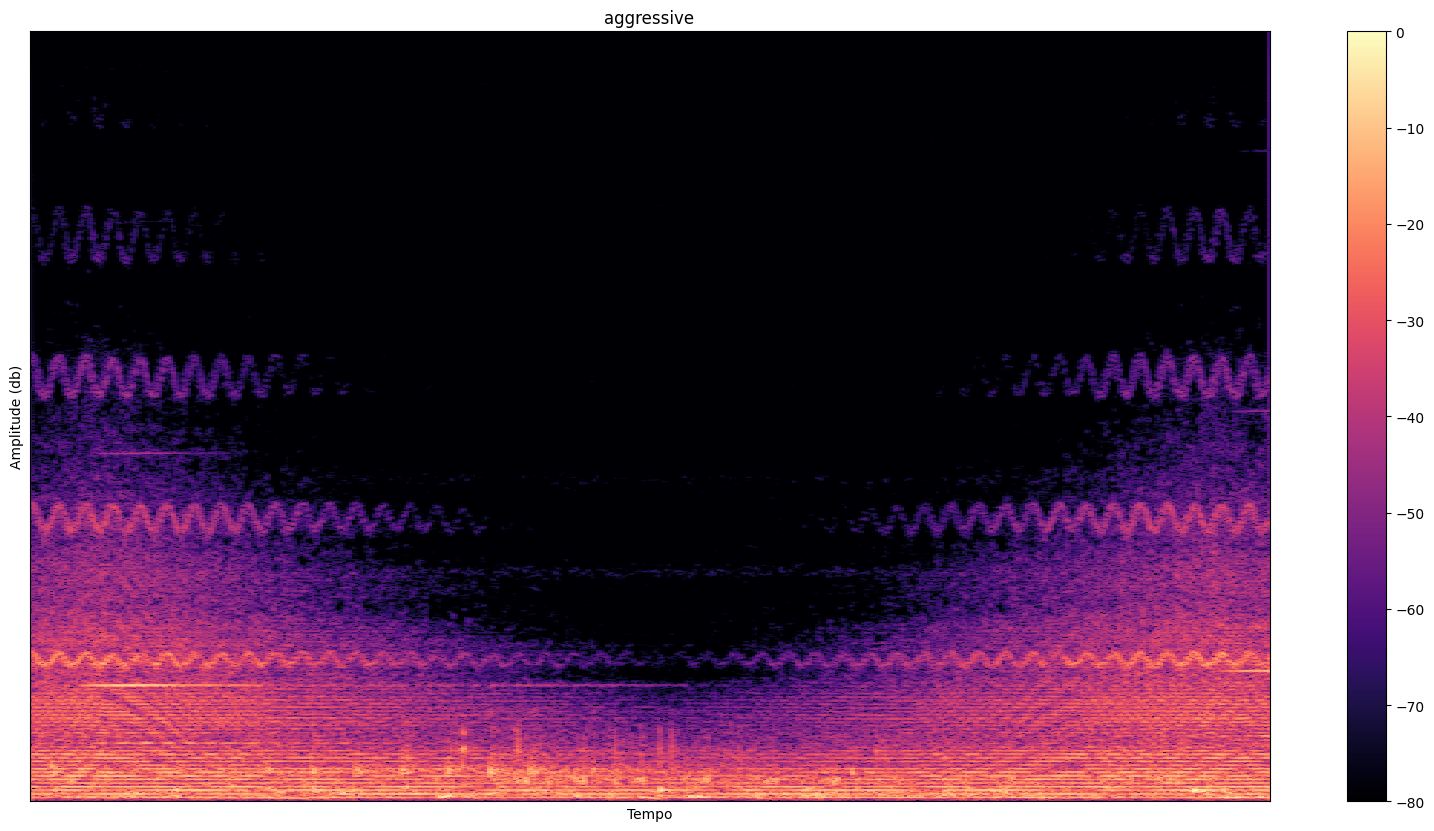

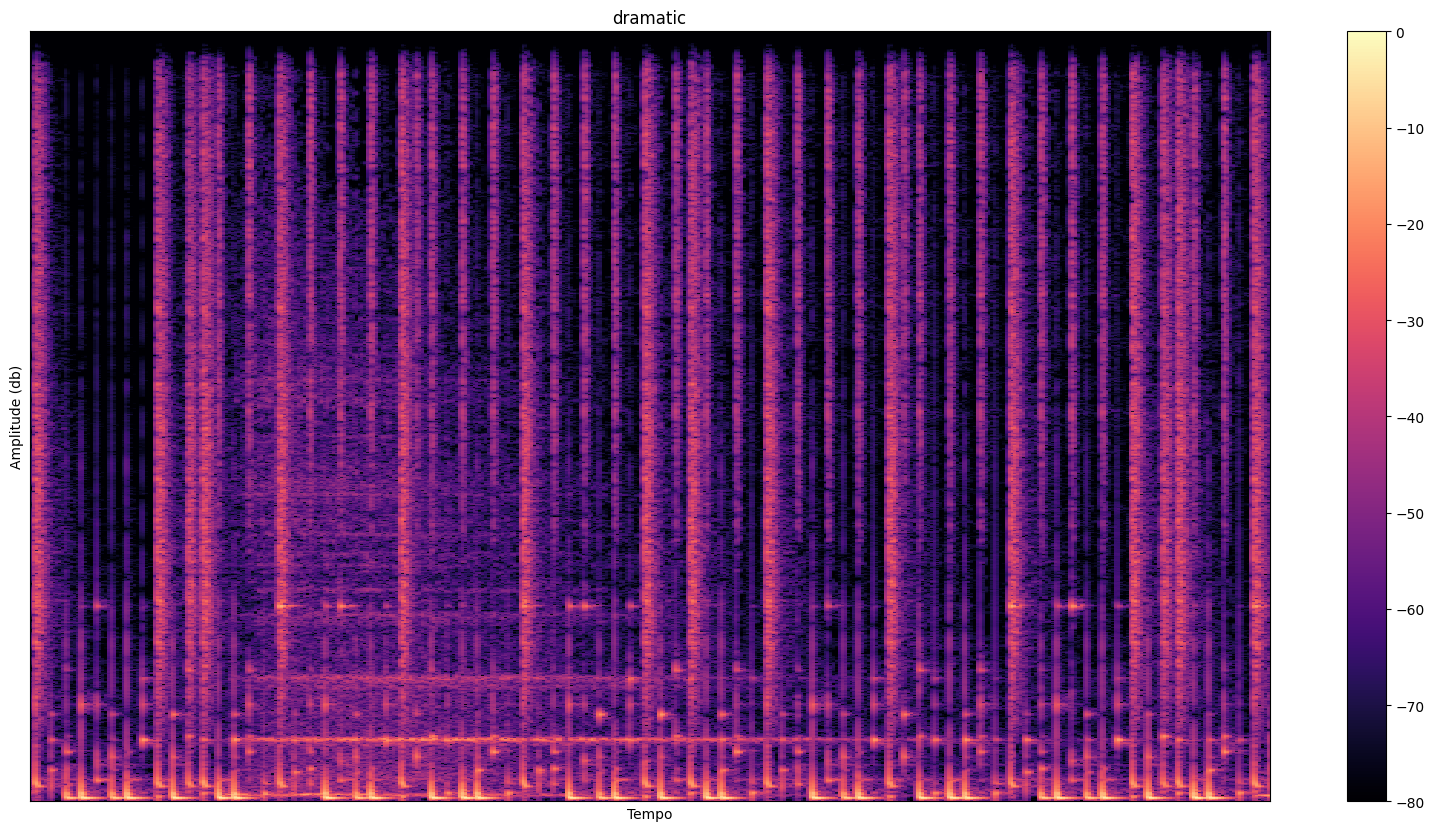

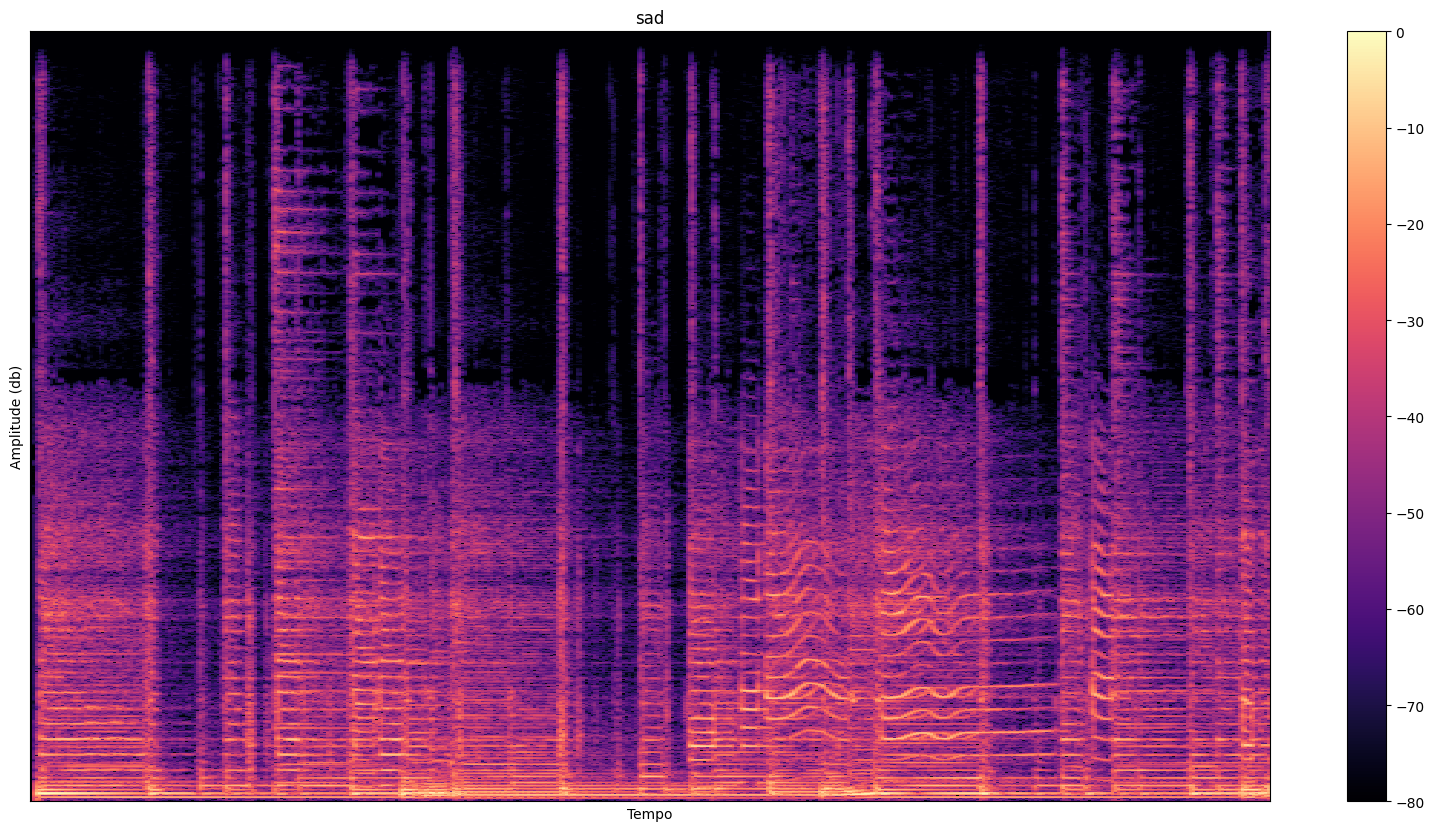

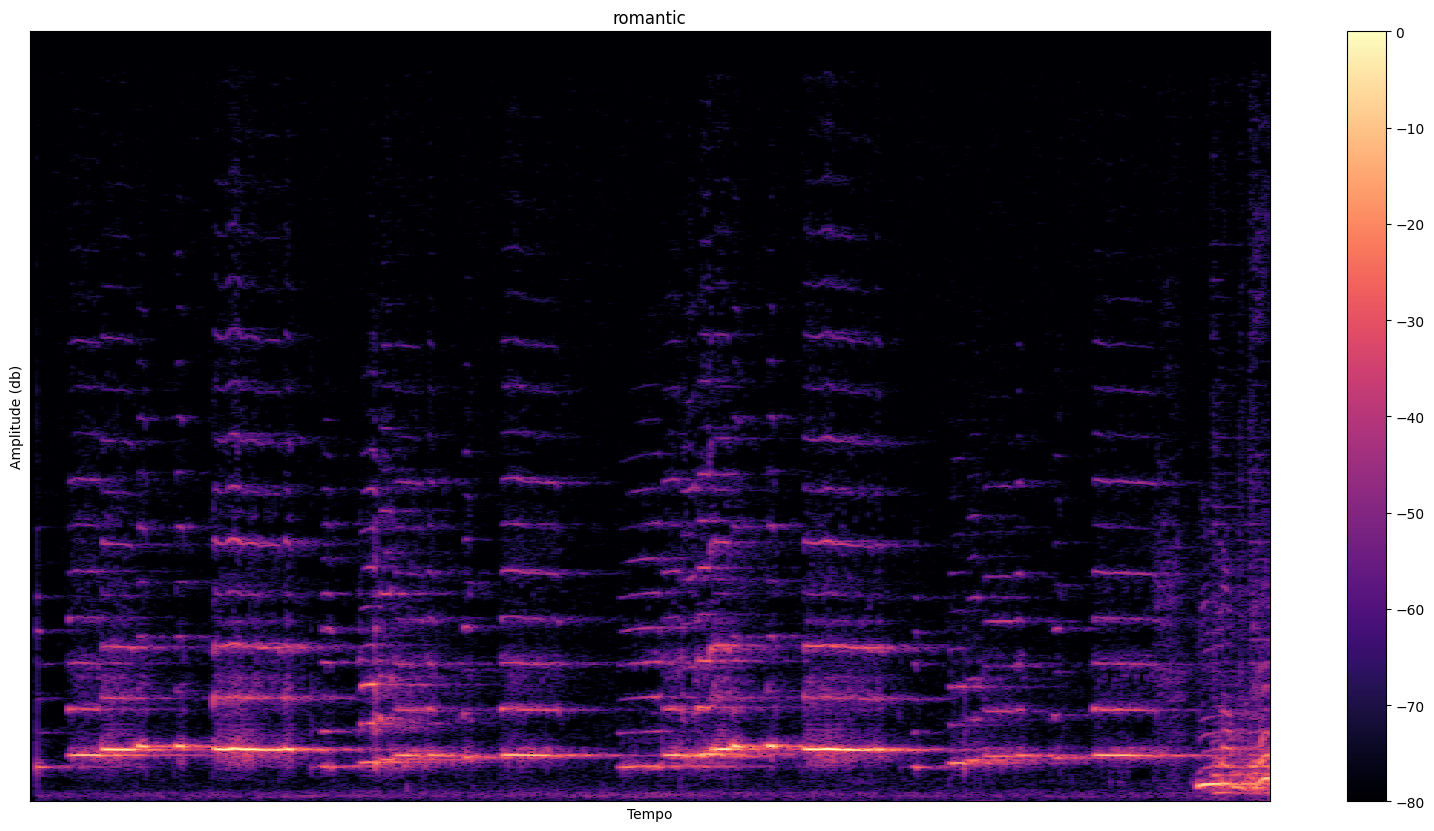

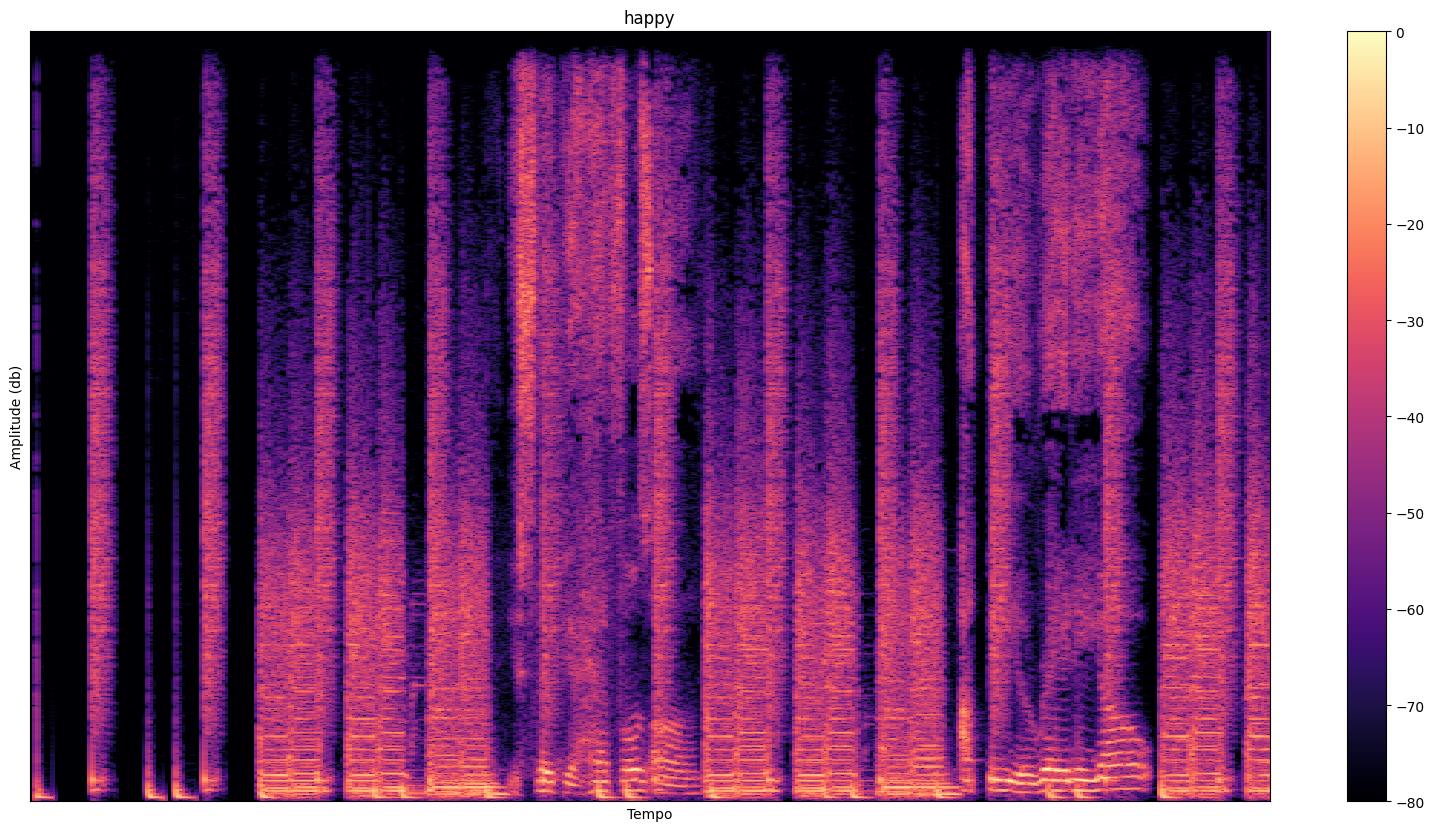

In [10]:
# Cria uma figura para visualizar os espectrogramas das amostras de áudio
fig = plt.figure(figsize=(10, 8))

# Itera sobre as amostras, calcula os espectrogramas e exibe cada um
for i, sample in enumerate(samples):
    # Calcula a transformada de Fourier de curto tempo (STFT) do sinal de áudio
    sample["frequencies"] = librosa.stft(sample["signal"])

    # Converte as amplitudes para decibéis
    sample["frequencies_db"] = librosa.amplitude_to_db(np.abs(sample["frequencies"]), ref=np.max)

    # Cria uma nova figura para cada espectrograma
    plt.figure(figsize=(20, 10))

    # Exibe o espectrograma
    librosa.display.specshow(sample["frequencies_db"])

    # Adiciona rótulos e título para melhor interpretação
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude (db)")
    plt.title(sample["mood"])

    # Adiciona uma barra de cor para indicar a intensidade das amplitudes
    plt.colorbar()

# Exibe a figura consolidando todos os espectrogramas
plt.show()

### Gráfico: MFCCs

<Figure size 1000x800 with 0 Axes>

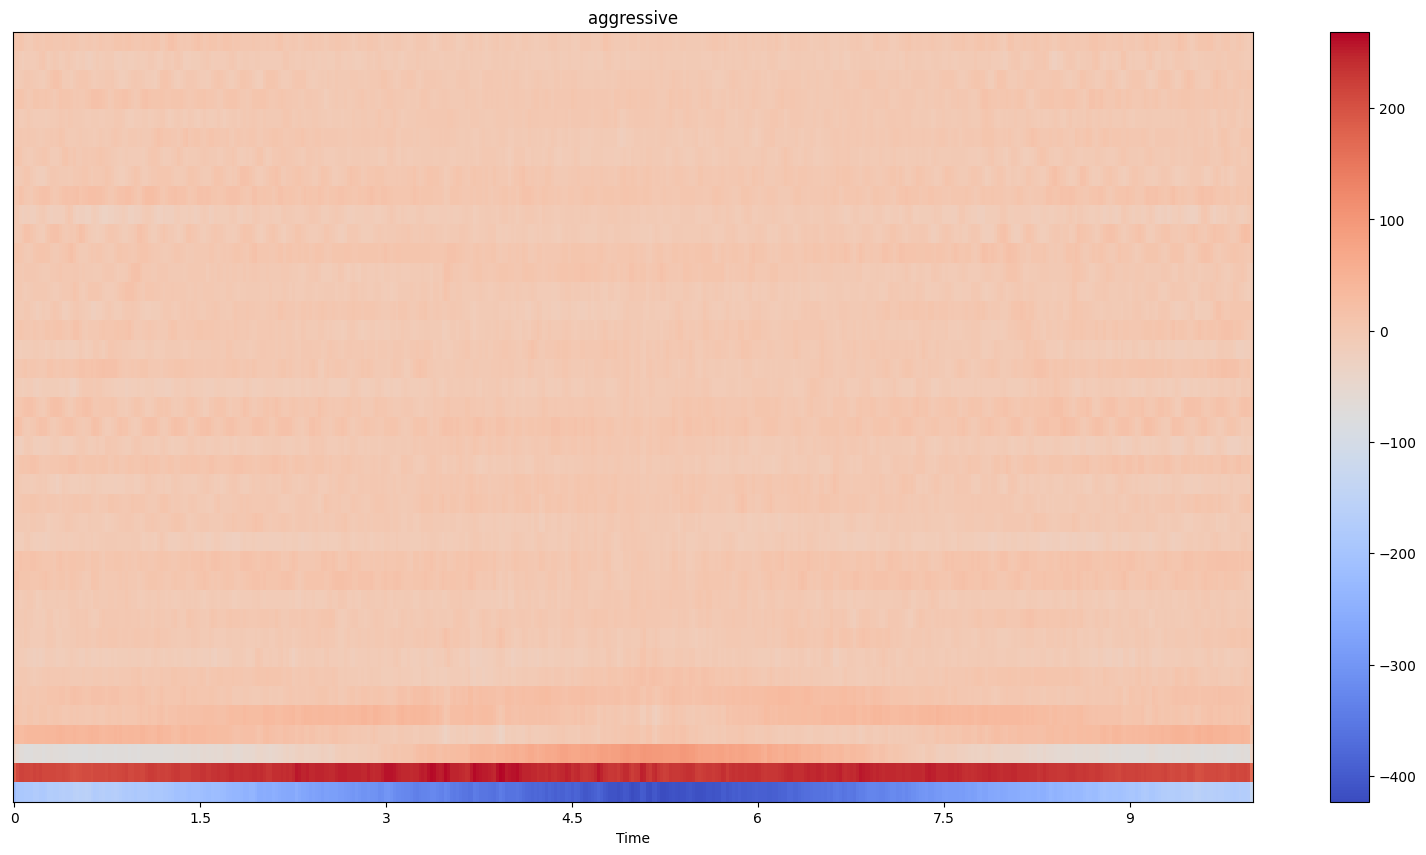

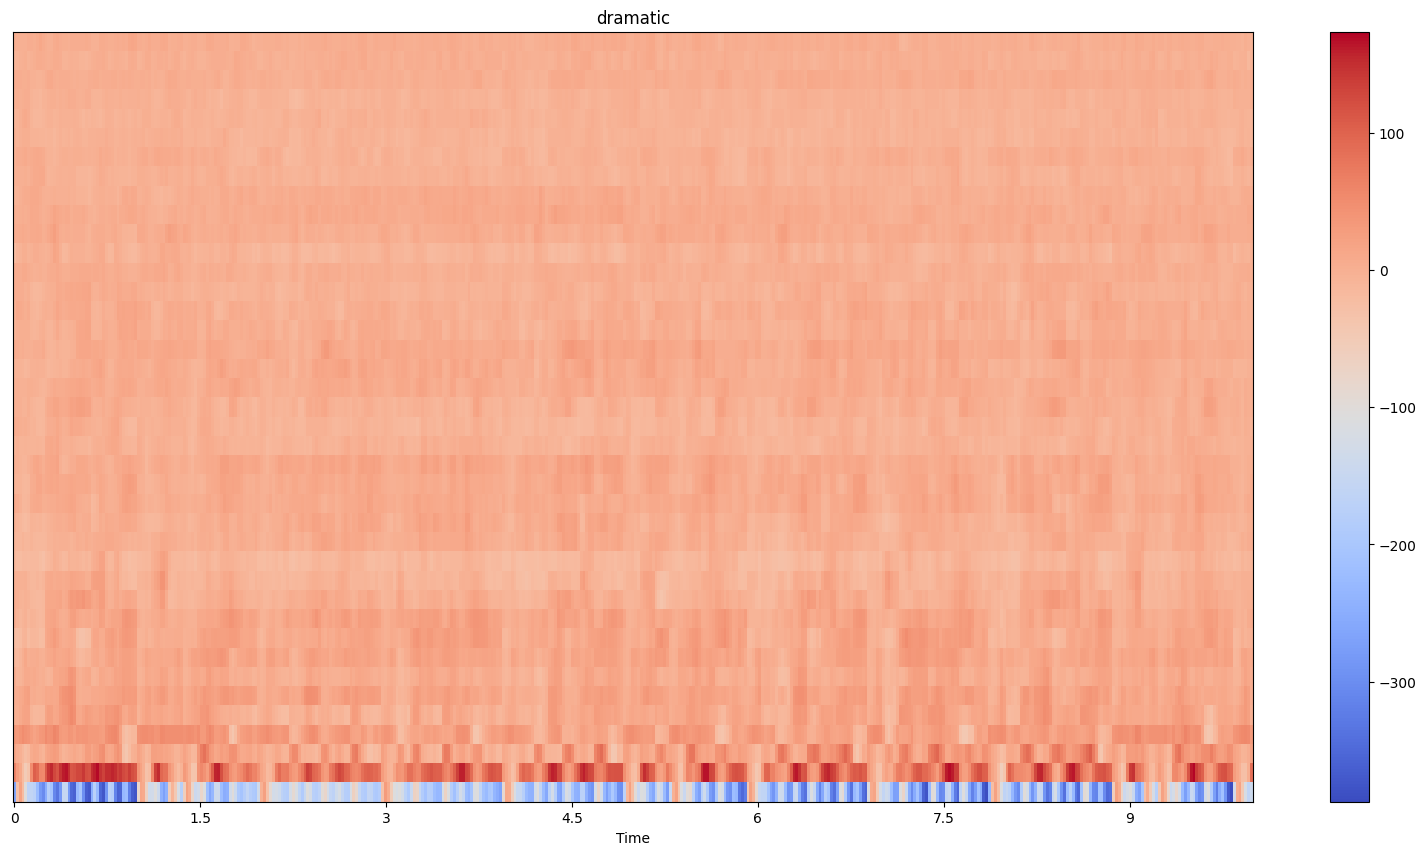

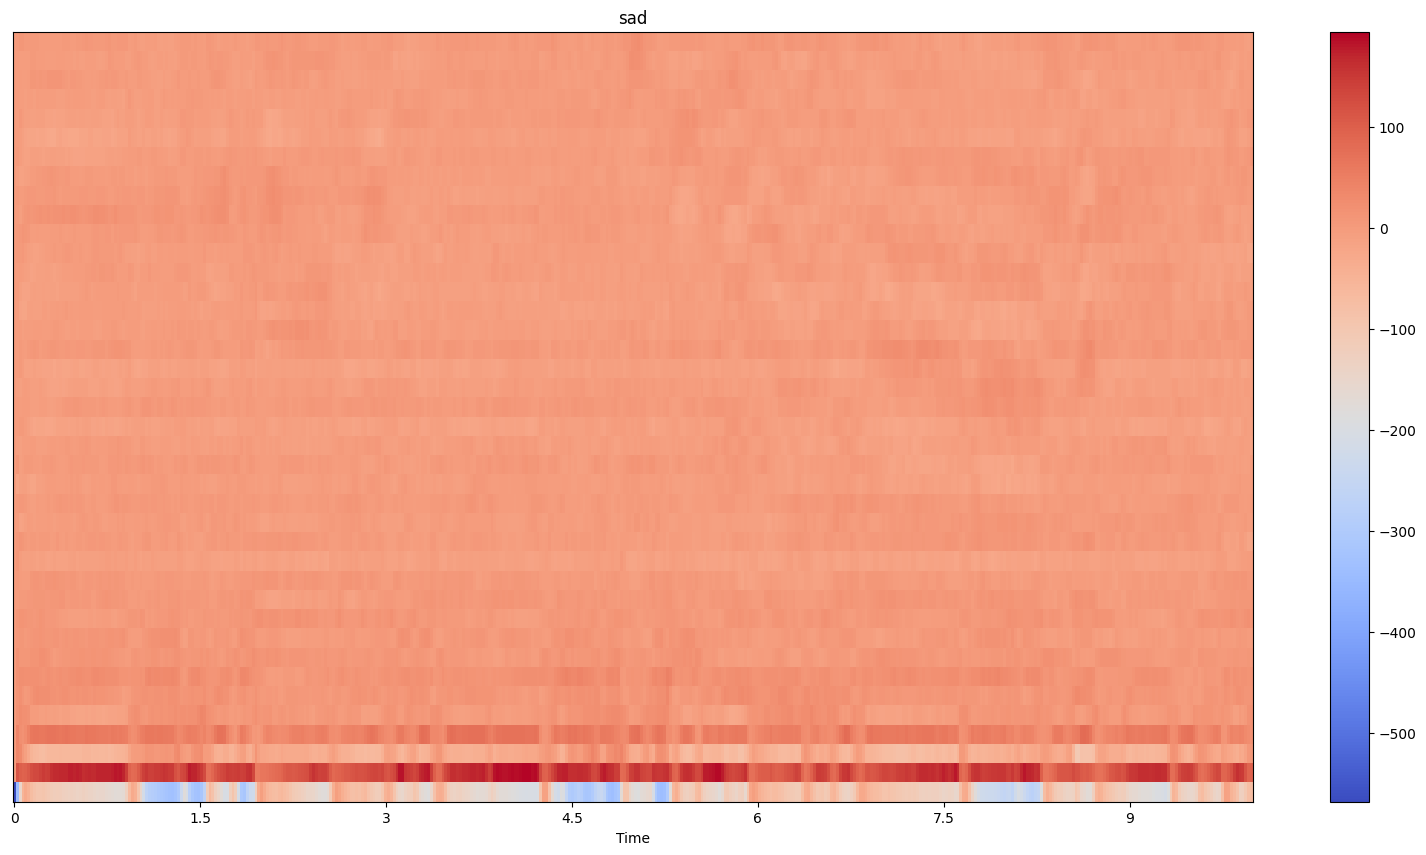

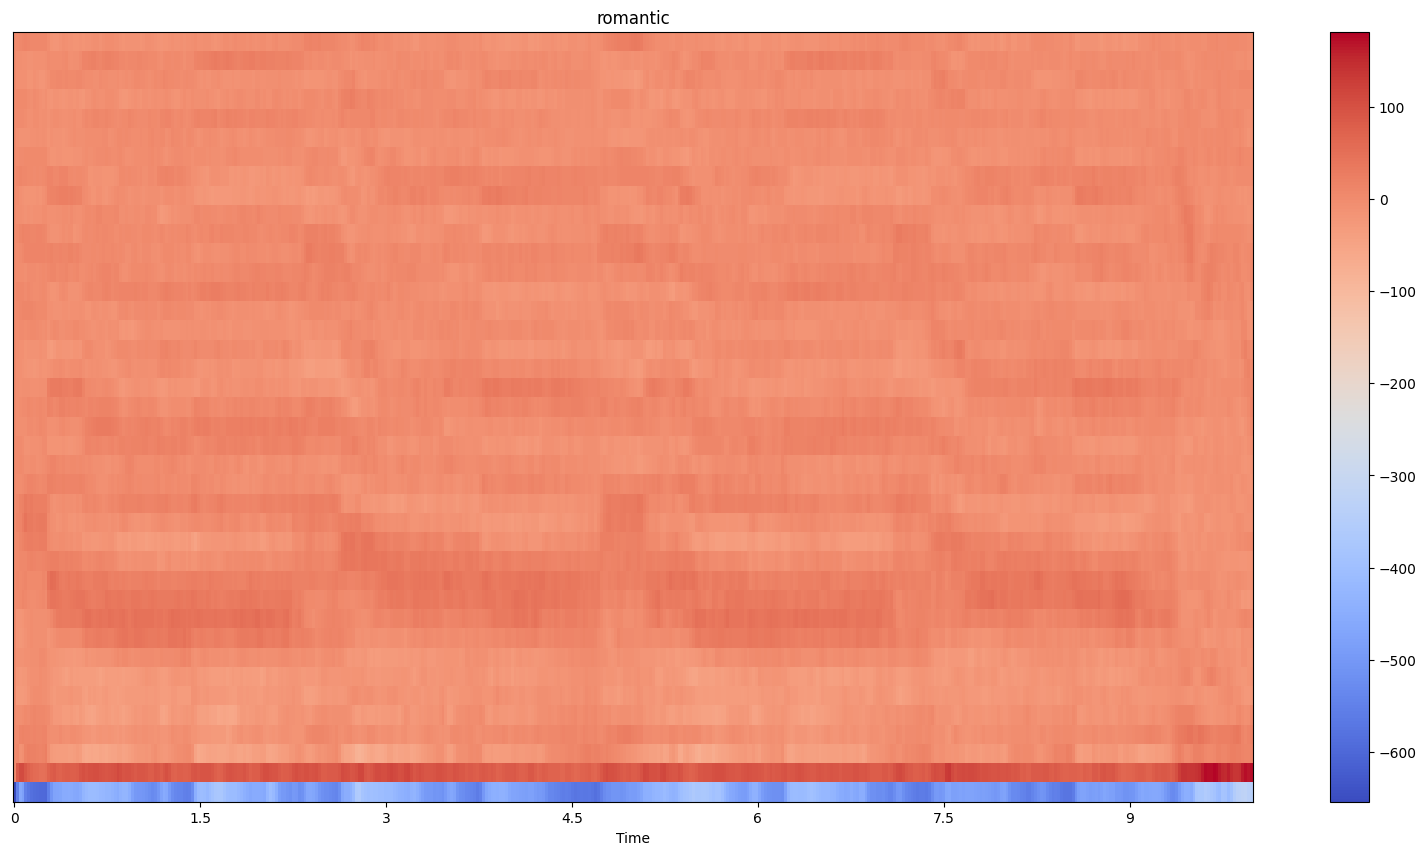

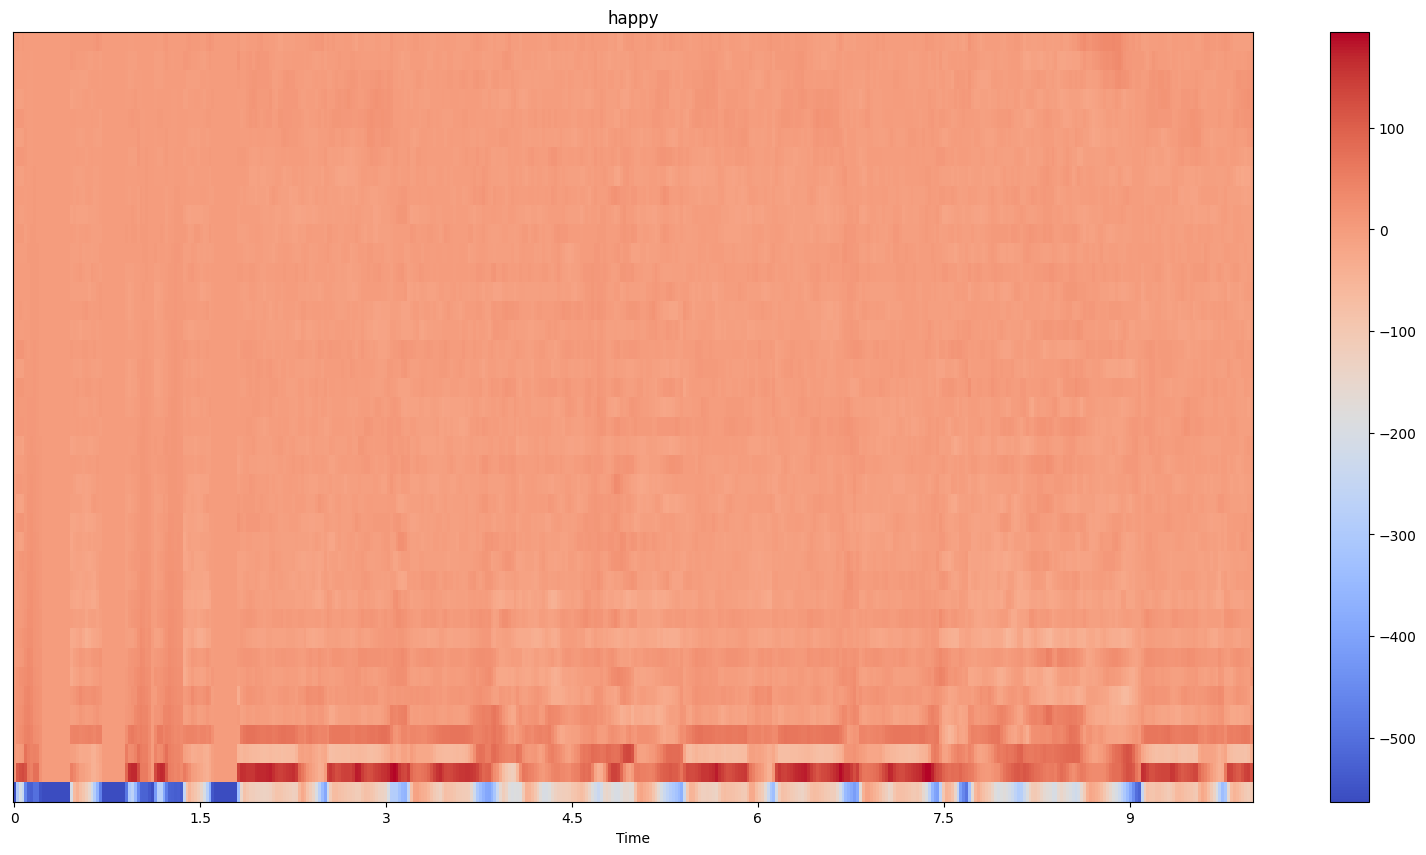

In [11]:
# Cria uma figura para visualizar os coeficientes cepstrais de frequência mel (MFCCs) das amostras de áudio
fig = plt.figure(figsize=(10, 8))

# Itera sobre as amostras, calcula os MFCCs e exibe cada um
for i, sample in enumerate(samples):
    # Calcula os MFCCs usando a função da biblioteca librosa
    sample["mfccs"] = librosa.feature.mfcc(y=sample["signal"], sr=sr, n_mfcc=40)

    # Cria uma nova figura para cada conjunto de MFCCs
    plt.figure(figsize=(20, 10))

    # Exibe os MFCCs
    librosa.display.specshow(sample["mfccs"], x_axis='time')

    # Adiciona título para melhor interpretação
    plt.title(sample["mood"])

    # Adiciona uma barra de cor para indicar a intensidade dos MFCCs
    plt.colorbar()

# Exibe a figura consolidando todos os conjuntos de MFCCs
plt.show()

## Extração de Características

### Seleção de Características

In [10]:
def getFeatures(filePath):
    # Carrega o sinal de áudio e a taxa de amostragem usando a biblioteca librosa
    signal, sr = librosa.load(filePath)

    # Calcula a tempo do sinal de áudio
    tempo = librosa.beat.tempo(y=signal)
    output = np.array(tempo)

    # Calcula o espectrograma mel do sinal de áudio
    stft = librosa.feature.melspectrogram(y=signal, sr=sr)
    stft_mean = np.mean(stft, axis=1)
    stft_std = np.std(stft, axis=1)
    output = np.hstack((output, stft_mean, stft_std))

    # Calcula os coeficientes cepstrais de frequência mel (MFCCs) do sinal de áudio
    mfccs = librosa.feature.mfcc(y=signal, sr=sr)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    output = np.hstack((output, mfccs_mean, mfccs_std))

    # Calcula a Zero Crossing Rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    zcr_mean = np.mean(zcr, axis=1)
    zcr_std = np.std(zcr, axis=1)
    output = np.hstack((output, zcr_mean, zcr_std))

    # Calcula a RMS Energy
    rms = librosa.feature.rms(y=signal)
    rms_mean = np.mean(rms, axis=1)
    rms_std = np.std(rms, axis=1)
    output = np.hstack((output, rms_mean, rms_std))

    # Calcula a Harmonic-to-Noise Ratio (HNR)
    hnr = librosa.effects.harmonic(signal)
    hnr_mean = np.mean(hnr)
    hnr_std = np.std(hnr)
    output = np.hstack((output, hnr_mean, hnr_std))


    # Calcula o Centróide Espectral
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid, axis=1)
    spectral_centroid_std = np.std(spectral_centroid, axis=1)
    output = np.hstack((output, spectral_centroid_mean, spectral_centroid_std))

    # Calcula o Contraste Espectral
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sr)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)
    output = np.hstack((output, spectral_contrast_mean, spectral_contrast_std))

    return output


### Checkpoint de Extração de Características

In [11]:
print("Extraindo Características...")
X_RF_25k, y_RF_25k = [], []

# Itera sobre as linhas do DataFrame 'data' para extrair características e rótulos
for i, row in data_RF_25k.iterrows():
    label = row["mood"]
    features = getFeatures(row["filePath"])
    X_RF_25k.append(features)
    y_RF_25k.append(label)
    if i % 100 == 0:
        print("#", end="")
print("\nConcluído")

Extraindo Características...
###
Concluído


## Display da Matriz de Confusão

In [12]:
def modelResults(y_train, y_pred):
    # Exibe a matriz de confusão
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

    # Exibe a matriz de confusão normalizada
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize="true", values_format=".0%")

    # Exibe o relatório de classificação
    print(skm.classification_report(y_train, y_pred, digits=3))

    # Calcula e exibe métricas de precisão, recall, f1-score e suporte médio ponderado
    print(skm.precision_recall_fscore_support(y_train, y_pred, average="macro"))

### Checando X & Y

In [13]:
# Converte as listas de características (X) e rótulos (y) em arrays NumPy
X_RF_25k = np.array(X_RF_25k)
y_RF_25k = np.array(y_RF_25k)

### Smoth

In [14]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import numpy as np
from imblearn.over_sampling import BorderlineSMOTE

# Suponha que X seja seu conjunto de características e y seja seus rótulos de classe
# X_RF_25k é o conjunto de características que você extraiu dos áudios
# y_RF_25k são os rótulos de classe correspondentes (por exemplo, emoções)

# Converter listas para arrays numpy
X = np.array(X_RF_25k)
y = np.array(y_RF_25k)


# Aplicar SMOTE
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

# Verificar os novos tamanhos dos conjuntos de dados
print("Tamanho original do conjunto de características:", X_smote.shape)
print("Tamanho original do conjunto de rótulos:", y_smote.shape)
print("Tamanho do conjunto de características após SMOTE:", X_smote.shape)
print("Tamanho do conjunto de rótulos após SMOTE:", y_smote.shape)

classes_interesse = ['aggressive', 'romantic', 'sad', 'dramatic', 'happy']

# Contar o número de ocorrências de cada classe
for classe in classes_interesse:
    num_ocorrencias = np.count_nonzero(y_smote == classe)
    print(f"Número de áudios da classe '{classe}': {num_ocorrencias}")





Defaulting to user installation because normal site-packages is not writeable
Tamanho original do conjunto de características: (430, 319)
Tamanho original do conjunto de rótulos: (430,)
Tamanho do conjunto de características após SMOTE: (430, 319)
Tamanho do conjunto de rótulos após SMOTE: (430,)
Número de áudios da classe 'aggressive': 86
Número de áudios da classe 'romantic': 86
Número de áudios da classe 'sad': 86
Número de áudios da classe 'dramatic': 86
Número de áudios da classe 'happy': 86


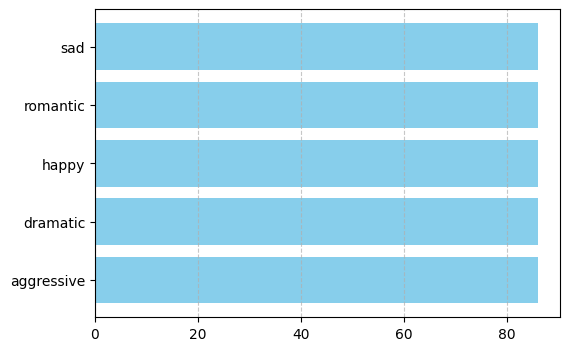

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que classes_interesse é uma lista das classes presentes em y_smote
classes_interesse = np.unique(y_smote)

# Contar o número de ocorrências de cada classe
ocorrencias = {classe: np.count_nonzero(y_smote == classe) for classe in classes_interesse}

# Converter o dicionário para listas de chaves e valores
classes = list(ocorrencias.keys())
num_ocorrencias = list(ocorrencias.values())

plt.figure(figsize=(6, 4))
plt.barh(classes, num_ocorrencias, color='skyblue')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("/home/camila/Jupyter_notebook/figura/smote.png", bbox_inches='tight')



## Modelo: Random Forest

#### Print de X

In [16]:
X_smote

array([[161.49902344,  19.68736649,  90.21541595, ...,   2.36310584,
          3.56262446,   5.24539431],
       [103.359375  ,   1.3041203 ,   5.22435379, ...,   3.27568026,
          3.95966248,   5.69131916],
       [151.99908088,   3.68105936,  10.28572369, ...,   2.04663676,
          1.73406729,   4.93458438],
       ...,
       [137.65782678,   0.87740359,  14.97805965, ...,   4.99817315,
          5.38845178,   3.88412567],
       [111.02301665, 265.84845204, 237.41160368, ...,   2.20674841,
          2.23013472,   5.13919796],
       [113.04340973,   0.38252357,   0.63569316, ...,   3.34312876,
          3.59233149,   5.12399349]])

#### Print de Y

In [17]:
y_smote

array(['aggressive', 'aggressive', 'aggressive', 'aggressive',
       'aggressive', 'aggressive', 'aggressive', 'aggressive',
       'aggressive', 'aggressive', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'dramatic',
       'dramatic', 'dramatic', 'dramatic', 'dramatic', 'sad', 'sad',
       'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad',
       'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad',
       'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 's

### Separando o Dataset em Treinamento e Teste

In [18]:
# Divide o conjunto de dados em conjuntos de treino e teste
X_train_RF_25k, X_test_RF_25k, y_train_RF_25k, y_test_RF_25k = train_test_split(X_smote, y_smote, random_state=42, test_size=0.2, stratify=y_smote)

# Exibe as dimensões dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train_RF_25k.shape)
print("Tamanho do conjunto de teste:", X_test_RF_25k.shape)
print("Tamanho dos rótulos de treino:", y_train_RF_25k.shape)
print("Tamanho dos rótulos de teste:", y_test_RF_25k.shape)

Tamanho do conjunto de treino: (344, 319)
Tamanho do conjunto de teste: (86, 319)
Tamanho dos rótulos de treino: (344,)
Tamanho dos rótulos de teste: (86,)


### Treinando usando Random Forest

In [19]:
### Dataset2 - 400

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found: {'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 50, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
              precision    recall  f1-score   support

  aggressive      0.850     1.000     0.919        17
    dramatic      0.882     0.882     0.882        17
       happy      0.833     0.588     0.690        17
    romantic      0.778     0.778     0.778        18
         sad      0.737     0.824     0.778        17

    accuracy                          0.814        86
   macro avg      0.816     0.814     0.809        86
weighted avg      0.816     0.814     0.809        86

(0.816061231510148, 0.8143790849673203, 0.8092965176129476, None)


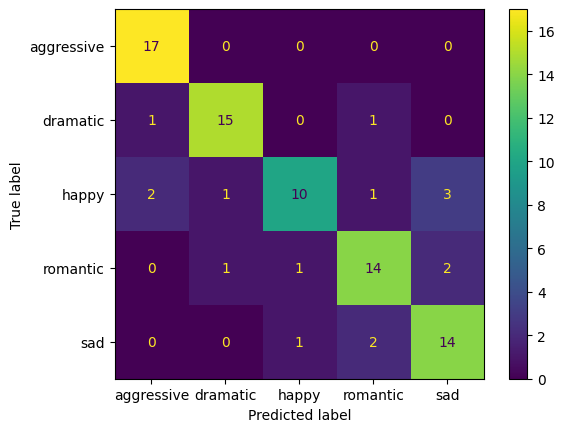

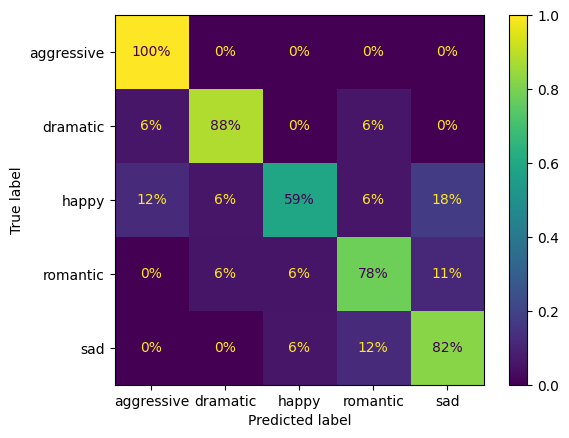

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

# Defina um objeto de validação cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use um grid de hiperparâmetros reduzido e mais focado
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'min_impurity_decrease': [0.0, 0.1],
    'max_leaf_nodes': [None, 10, 20, 30, 50]
}

# Criar uma instância do RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Criar uma instância do RandomizedSearchCV com menos iterações
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=rf_param_grid, 
                                   n_iter=200, 
                                   scoring='accuracy', 
                                   cv=stratified_kfold, 
                                   verbose=1, 
                                   random_state=42, 
                                   n_jobs=-1)

# Executar a pesquisa aleatória de hiperparâmetros
random_search.fit(X_train_RF_25k, y_train_RF_25k)

# Imprimir os melhores hiperparâmetros encontrados
print("Best parameters found:", random_search.best_params_)

# Avaliar o modelo no conjunto de teste usando os melhores hiperparâmetros
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test_RF_25k)

# Avaliar o desempenho do modelo no conjunto de teste usando a função modelResults
modelResults(y_test_RF_25k, y_test_pred)


### Resultados do Random Forest

In [29]:
### Predicao

### 1 label  ###Autoral

In [30]:
# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Pula o cabeçalho, se existir
    for row in csvreader:
        if len(row) >= 2:
            audio_id, emotion = row[:2]  # Lê apenas as duas primeiras colunas
            print(f"ID do Áudio: {audio_id}, Emoção: {emotion}")
            emotions_actual[audio_id + '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Exibir o número total de entradas carregadas
print(f"Total de entradas carregadas: {len(emotions_actual)}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'

for audio_file in os.listdir(dataset_path):
    audio_path = os.path.join(dataset_path, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = best_model.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)
        

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = len(predictions)
for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if actual_emotion == predicted_emotion:
            correct_predictions += 1
    else:
        total_predictions -= 1

# Imprime a acurácia do modelo
accuracy = correct_predictions / total_predictions
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Músicas com emoção real como None: {none_audio_files}')
print(f'Músicas totais: {total_predictions}')

ID do Áudio: 499, Emoção: aggressive
ID do Áudio: 439, Emoção: aggressive
ID do Áudio: 271, Emoção: aggressive
ID do Áudio: 297, Emoção: aggressive
ID do Áudio: 447, Emoção: aggressive
ID do Áudio: 155, Emoção: aggressive
ID do Áudio: 485, Emoção: aggressive
ID do Áudio: 243, Emoção: aggressive
ID do Áudio: 280, Emoção: aggressive
ID do Áudio: 134, Emoção: aggressive
ID do Áudio: 410, Emoção: aggressive
ID do Áudio: 125, Emoção: aggressive
ID do Áudio: 294, Emoção: aggressive
ID do Áudio: 415, Emoção: aggressive
ID do Áudio: 151, Emoção: dramatic
ID do Áudio: 97, Emoção: dramatic
ID do Áudio: 58, Emoção: dramatic
ID do Áudio: 427, Emoção: dramatic
ID do Áudio: 422, Emoção: dramatic
ID do Áudio: 137, Emoção: dramatic
ID do Áudio: 166, Emoção: dramatic
ID do Áudio: 162, Emoção: dramatic
ID do Áudio: 49, Emoção: dramatic
ID do Áudio: 148, Emoção: dramatic
ID do Áudio: 471, Emoção: dramatic
ID do Áudio: 107, Emoção: dramatic
ID do Áudio: 53, Emoção: dramatic
ID do Áudio: 239, Emoção: drama

In [40]:
import os
import csv
import shutil
import random

# Função para extrair características do áudio
def getFeatures(audio_path):
    # Esta função deve retornar as características do áudio
    pass  # Implementar a lógica de extração de características aqui

# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) >= 2:
            audio_id, emotion = row[:2]  # Lê apenas as duas primeiras colunas
            emotions_actual[audio_id.zfill(3) + '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'

for audio_file in os.listdir(dataset_path):
    audio_path = os.path.join(dataset_path, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = best_model.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = 0

for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        total_predictions += 1
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if actual_emotion == predicted_emotion:
            correct_predictions += 1

print(f'Total predictions = :{total_predictions}') 
# Imprime a acurácia do modelo
if total_predictions > 0:
    accuracy = correct_predictions / total_predictions
    print(f'Acurácia do modelo: {accuracy * 100:.2f}%')
else:
    print('Nenhuma música com emoção real disponível para cálculo da acurácia.')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Músicas com emoção real como None: {none_audio_files}')


ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 1 label  ###2500

In [41]:
# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) >= 2:
            audio_id, emotion = row[:2]  # Lê apenas as duas primeiras colunas
            emotions_actual[audio_id.zfill(3) + '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'

for audio_file in os.listdir(dataset_path):
    audio_path = os.path.join(dataset_path, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = best_model.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = len(predictions)
for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if actual_emotion == predicted_emotion:
            correct_predictions += 1

# Imprime a acurácia do modelo
accuracy = correct_predictions / total_predictions
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Músicas com emoção real como None: {none_audio_files}')

ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao_2, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) >= 2:
            audio_id, emotion = row[:2]  # Lê apenas as duas primeiras colunas
            emotions_actual[audio_id.zfill(3) + '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'

for audio_file in os.listdir(dataset_path_2):
    audio_path = os.path.join(dataset_path_2, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = best_model.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = len(predictions)
for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if actual_emotion == predicted_emotion:
            correct_predictions += 1

# Imprime a acurácia do modelo
accuracy = correct_predictions / total_predictions
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Músicas com emoção real como None: {none_audio_files}')

Música: 6019.wav | Predição do modelo: sad | Emoção real da música: romantic
Música: 14397.wav | Predição do modelo: sad | Emoção real da música: dramatic
Música: 10361.wav | Predição do modelo: sad | Emoção real da música: sad
Música: 17916.wav | Predição do modelo: romantic | Emoção real da música: happy
Música: 6766.wav | Predição do modelo: dramatic | Emoção real da música: aggressive
Música: 7155.wav | Predição do modelo: happy | Emoção real da música: aggressive
Música: 9952.wav | Predição do modelo: happy | Emoção real da música: sad
Música: 6044.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 9649.wav | Predição do modelo: sad | Emoção real da música: sad
Música: 5620.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 19230.wav | Predição do modelo: dramatic | Emoção real da música: happy
Música: 5699.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 7193.wav | Predição do modelo: happy | Emoção r

In [20]:
###Another

In [ ]:
### Extreção de caracteristicas 2

### 2 labels

In [63]:
# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) >= 2:
            audio_id, *emotion = row #Lê mais de uma emoção se tiver
            emotions_actual[audio_id.zfill(3) + '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'
for audio_file in os.listdir(dataset_path):
    audio_path = os.path.join(dataset_path, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = random_search.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = len(predictions)
for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if predicted_emotion in actual_emotion:
          correct_predictions += 1

# Imprime a acurácia do modelo
accuracy = correct_predictions / total_predictions
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Número de músicas totais: {len(predictions)}')
print(f'Músicas com emoção real como None: {none_audio_files}')

/tmp/ipykernel_43934/117591579.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipykernel_43934/117591579.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipykernel_43934/117591579.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipykernel_43934/117591579.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipy

Música: 305.wav | Predição do modelo: dramatic | Emoção real da música: ['romantic', 'happy']
Música: 003.wav | Predição do modelo: sad | Emoção real da música: ['sad', '']
Música: 018.wav | Predição do modelo: happy | Emoção real da música: ['happy', '']
Música: 355.wav | Predição do modelo: romantic | Emoção real da música: ['happy', '']
Música: 296.wav | Predição do modelo: happy | Emoção real da música: ['happy', 'dramatic']
Música: 197.wav | Predição do modelo: romantic | Emoção real da música: ['romantic', '']
Música: 090.wav | Predição do modelo: happy | Emoção real da música: ['happy', '']
Música: 095.wav | Predição do modelo: happy | Emoção real da música: ['dramatic', '']
Música: 151.wav | Predição do modelo: aggressive | Emoção real da música: ['happy', '']
Música: 009.wav | Predição do modelo: aggressive | Emoção real da música: ['dramatic', '']
Música: 192.wav | Predição do modelo: happy | Emoção real da música: ['aggressive', '']
Música: 074.wav | Predição do modelo: dram

## Modelo: Multi Layer Perceptron

### Mostrando o dataset

### Checando os valores de entrada

In [31]:
# Calcula e exibe a contagem de ocorrências de cada valor na coluna 'mood' do DataFrame 'data'
data_RF_25k["mood"].value_counts()

mood
happy         86
dramatic      47
sad           44
romantic      37
aggressive    10
Name: count, dtype: int64

### Separando o Dataset em Treinamento e Teste

In [32]:
# Divide o conjunto de dados em conjuntos de treino e teste
X_train_MLP_25k, X_test_MLP_25k, y_train_MLP_25k, y_test_MLP_25k = train_test_split(X_smote, y_smote, random_state=42, test_size=0.2, stratify=y_smote)

# Exibe as dimensões dos conjuntos de treino e teste
print("Shape do conjunto de treino:", X_train_MLP_25k.shape)
print("Shape do conjunto de teste:", X_test_MLP_25k.shape)
print("Shape dos rótulos de treino:", y_train_MLP_25k.shape)
print("Shape dos rótulos de teste:", y_test_MLP_25k.shape)

Shape do conjunto de treino: (344, 319)
Shape do conjunto de teste: (86, 319)
Shape dos rótulos de treino: (344,)
Shape dos rótulos de teste: (86,)


### Treinando usando MLP

Melhores parâmetros encontrados:
{'mlp__activation': 'relu', 'mlp__alpha': 0.008239850584517124, 'mlp__batch_size': 128, 'mlp__beta_1': 0.9626646475023451, 'mlp__beta_2': 0.3347275844734987, 'mlp__epsilon': 6.92743839627041e-08, 'mlp__hidden_layer_sizes': (150,), 'mlp__learning_rate': 'constant', 'mlp__learning_rate_init': 0.006734583230160926, 'mlp__max_iter': 659, 'mlp__momentum': 0.21552455160567807, 'mlp__n_iter_no_change': 17, 'mlp__solver': 'lbfgs'}
Acurácia do modelo nos dados de teste: 0.7558139534883721
              precision    recall  f1-score   support

  aggressive      0.895     1.000     0.944        17
    dramatic      0.700     0.824     0.757        17
       happy      0.750     0.529     0.621        17
    romantic      0.700     0.778     0.737        18
         sad      0.733     0.647     0.688        17

    accuracy                          0.756        86
   macro avg      0.756     0.756     0.749        86
weighted avg      0.755     0.756     0.749     

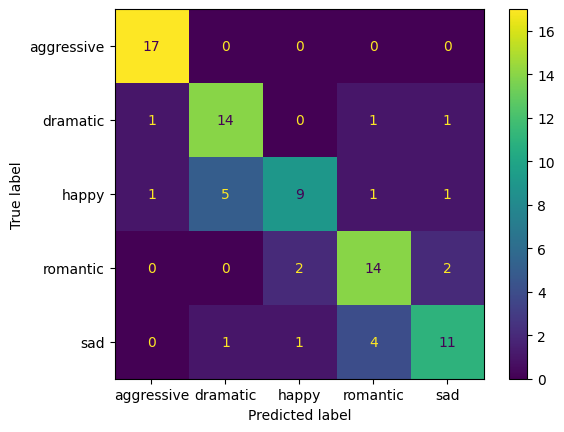

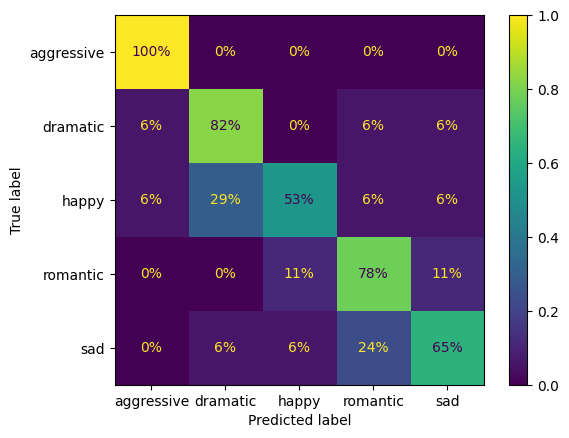

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definição dos hiperparâmetros com escalas reduzidas
param_dist = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (150, 100), (200,), (250,)],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__solver': ['adam', 'sgd', 'lbfgs'],
    'mlp__alpha': uniform(loc=0, scale=0.01),  # Ampliando a escala
    'mlp__batch_size': [16, 32, 64, 128],  # Adicionando mais tamanhos de lote
    'mlp__learning_rate': ['constant', 'adaptive', 'invscaling'],  # Adicionando 'invscaling'
    'mlp__learning_rate_init': uniform(loc=0.0001, scale=0.01),  # Ampliando a escala
    'mlp__max_iter': randint(200, 1000),  # Aumentando o número máximo de iterações
    'mlp__momentum': uniform(loc=0.1, scale=0.9),  # Ampliando a escala
    'mlp__beta_1': uniform(loc=0.1, scale=0.9),  # Ampliando a escala
    'mlp__beta_2': uniform(loc=0.1, scale=0.9),  # Ampliando a escala
    'mlp__epsilon': uniform(loc=1e-9, scale=1e-7),  # Ampliando a escala
    'mlp__n_iter_no_change': randint(5, 20)  # Aumentando o número máximo de iterações sem melhoria
}

# Definição da pipeline com regularização L2 e dropout
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(early_stopping=True, validation_fraction=0.1))
])

# Inicializar a busca aleatória
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=2000, cv=StratifiedKFold(n_splits=5), n_jobs=-1, random_state=42, scoring='accuracy')

# Realizar a busca aleatória
random_search.fit(X_train_MLP_25k, y_train_MLP_25k)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# Avaliar o desempenho do modelo com os melhores parâmetros no conjunto de teste
best_model_mlp = random_search.best_estimator_
accuracy = best_model_mlp.score(X_test_MLP_25k, y_test_MLP_25k)
y_test_pred_MLP_25k = best_model_mlp.predict(X_test_MLP_25k)
print("Acurácia do modelo nos dados de teste:", accuracy)
modelResults(y_test_MLP_25k, y_test_pred_MLP_25k)


### Resultados do MLP

#### Treinamento

#### Teste

### Predição

In [38]:
# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) >= 2:
            audio_id, emotion = row[:2]  # Lê apenas as duas primeiras colunas
            emotions_actual[audio_id+ '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'

for audio_file in os.listdir(dataset_path):
    audio_path = os.path.join(dataset_path, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = best_model_mlp.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = len(predictions)
for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if actual_emotion == predicted_emotion:
            correct_predictions += 1

# Imprime a acurácia do modelo
accuracy = correct_predictions / total_predictions
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Músicas com emoção real como None: {none_audio_files}')

Música: 44.wav | Predição do modelo: sad | Emoção real da música: romantic
Música: 412.wav | Predição do modelo: romantic | Emoção real da música: happy
Música: 498.wav | Predição do modelo: romantic | Emoção real da música: happy
Música: 30.wav | Predição do modelo: dramatic | Emoção real da música: happy
Música: 97.wav | Predição do modelo: dramatic | Emoção real da música: dramatic
Música: 77.wav | Predição do modelo: sad | Emoção real da música: romantic
Música: 472.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 439.wav | Predição do modelo: aggressive | Emoção real da música: aggressive
Música: 271.wav | Predição do modelo: happy | Emoção real da música: aggressive
Música: 483.wav | Predição do modelo: sad | Emoção real da música: romantic
Música: 148.wav | Predição do modelo: happy | Emoção real da música: dramatic
Música: 53.wav | Predição do modelo: happy | Emoção real da música: dramatic
Música: 83.wav | Predição do modelo: dramatic | Emoção real 

In [34]:
# Carregar as emoções reais do CSV
emotions_actual = {}
with open(csv_predicao_2, "r", encoding="utf-8") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) >= 2:
            audio_id, emotion = row[:2]  # Lê apenas as duas primeiras colunas
            emotions_actual[audio_id.zfill(3) + '.wav'] = emotion  # Correlaciona o número com o nome do arquivo
        else:
            print(f"Entrada inválida: {row}")

# Percorrer os áudios no novo conjunto de dados e armazenar as predições
predictions = {}
none_audio_files = []  # Lista para armazenar os arquivos associados a 'None'

for audio_file in os.listdir(dataset_path_2):
    audio_path = os.path.join(dataset_path_2, audio_file)
    # Extrair características do áudio de 10 segundos
    features = getFeatures(audio_path)
    # Fazer a previsão com o modelo
    prediction = best_model.predict([features])
    predictions[audio_file] = prediction[0]

    # Verifica se a emoção real está presente no CSV
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is None:  # Se a emoção real não estiver presente
        none_audio_files.append(audio_file)

# Comparar as predições com as emoções reais e imprimir
correct_predictions = 0
total_predictions = len(predictions)
for audio_file, predicted_emotion in predictions.items():
    actual_emotion = emotions_actual.get(audio_file, None)
    if actual_emotion is not None:  # Se a emoção real estiver presente
        print(f'Música: {audio_file} | Predição do modelo: {predicted_emotion} | Emoção real da música: {actual_emotion}')
        if actual_emotion == predicted_emotion:
            correct_predictions += 1

# Imprime a acurácia do modelo
accuracy = correct_predictions / total_predictions
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprime informações sobre os 'None'
print(f'Número de músicas com emoção real como None: {len(none_audio_files)}')
print(f'Músicas com emoção real como None: {none_audio_files}')

/tmp/ipykernel_5494/3367045278.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipykernel_5494/3367045278.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipykernel_5494/3367045278.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipykernel_5494/3367045278.py:6: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=signal)
/tmp/ipy

Música: 6019.wav | Predição do modelo: sad | Emoção real da música: romantic
Música: 14397.wav | Predição do modelo: sad | Emoção real da música: dramatic
Música: 10361.wav | Predição do modelo: sad | Emoção real da música: sad
Música: 17916.wav | Predição do modelo: sad | Emoção real da música: happy
Música: 6766.wav | Predição do modelo: happy | Emoção real da música: aggressive
Música: 7155.wav | Predição do modelo: happy | Emoção real da música: aggressive
Música: 9952.wav | Predição do modelo: romantic | Emoção real da música: sad
Música: 6044.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 9649.wav | Predição do modelo: romantic | Emoção real da música: sad
Música: 5620.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 19230.wav | Predição do modelo: happy | Emoção real da música: happy
Música: 5699.wav | Predição do modelo: romantic | Emoção real da música: romantic
Música: 7193.wav | Predição do modelo: happy | Emoção real